<a href="https://colab.research.google.com/github/ValentinBarco/UPSO-ML-BD/blob/main/Carpeta1/Histograma_RGB_Valentin_Barco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cv2_imshow(ortopanto_monocroma)### Propuesta: haremos la tarea obligatoria mañana sábado de 9 a 11 en aula 23H. Sala de conferencias del Dpto Fisica. Traer compu personal

1. **Abrir una imagen y explorar sus datos.**

+ a) Abra la imagen *vegetacion_cielo.jpg* (de la carpeta compartida), grafíquela y muestre la dimensión (cantidad de filas, columnas, canlaes), muestre el tipo de dato que contiene.
+ b) Realice el histograma de los 3 canales en un mismo gráfico. **Interprete y comente.**

2. **Binarización.**

+ a) Pase la imagen a monocroma. Elija un umbral adecuado para binarizar dicha imagen monocroma, que *intente* separar el cielo de la vegentación,
+ b) Muestre en subplots, la imagen original, la monocroma en escala de grises y la binarizada. Comente e interprete resultados.

3. **Clustering**

+ a) Pase la misma imagen vegetacion_cielo.jpg, a formato Data Frame (cada pixel en una fila)
+ b) Elija algún modelo de Clusterización (k-means,DBCAN, MeanShift) para realizar clusterización dentro de dicha imagen.
Utilice las características que crea necesarias  y adecuadas para el problema (RGB a priori, pero pueden ser otras como las usadas en Ntb8).
¿Cuantos clusters recomienda el método del codo? ¿Concuerda con lo que ve en la imagen?
+ c) Grafique los resultados de la clusterización en el espacio RGB y también en la imagen etiquetada por clusters.Obtuvo los resultados esperados? Comente, interprete.



**IMPORTANTE: Realice comentarios e interpretaciones personales luego de los bloques de código.**

# Importacion de librerias

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from google.colab.patches import cv2_imshow

# Abro Imagen

In [ ]:

Imagen=cv2.imread('vegetacion_cielo.jpg')
height, width,prof = Imagen.shape #alto (y, #filas) y ancho (x, #columnas)
print('dimensiones original','height',height,'width', width, 'profundidad', prof)
print('el tipo de dato de la imagen es: ', type(Imagen))

dimensiones original height 1569 width 1879 profundidad 3
el tipo de dato de la imagen es:  <class 'numpy.ndarray'>


# Muestro Imagen

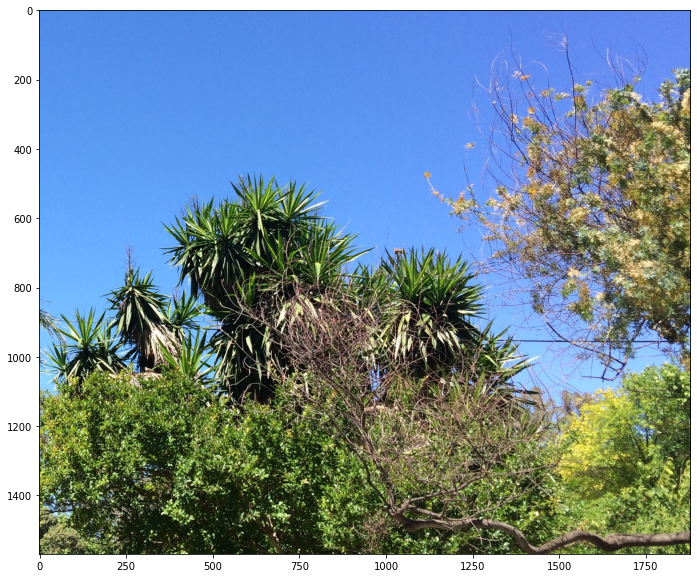

In [ ]:
ImagenRGB=cv2.cvtColor(Imagen,cv2.COLOR_BGR2RGB )
plt.figure(figsize=(12,10))
plt.imshow(ImagenRGB)


# Histograma en RGB

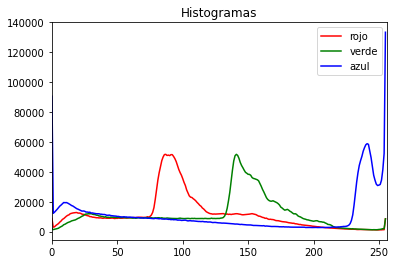

In [ ]:

color = ('r','g','b')
for i, c in enumerate(color):
    hist = cv2.calcHist([ImagenRGB], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
plt.title('Histogramas')
plt.legend(['rojo','verde','azul'])
plt.show()

Podemos ver que el los 3 colores tienen predominancia en diferentes intensidades, por ejemplo, los pixeles de mayor intensidad viene teniendo mayor cantidad de azul y es el cielo de la imagen.

# Binarización


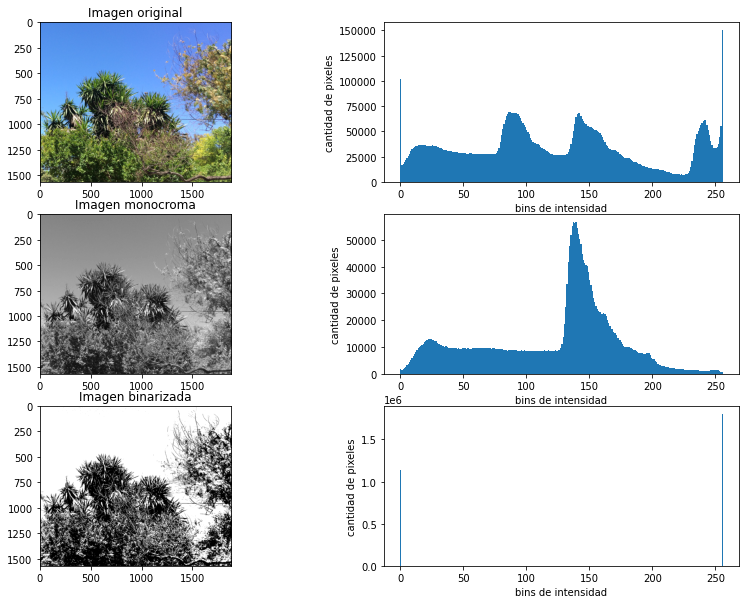

In [ ]:
ImagenGray=cv2.imread('vegetacion_cielo.jpg',cv2.IMREAD_GRAYSCALE)

umbral=125 #Utilizo este humbral porque al analizar el histograma en monocroma, se puede ver que
ret,binaria = cv2.threshold(ImagenGray,umbral,255,cv2.THRESH_BINARY)

fig, axs = plt.subplots(nrows=3, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(10)
fig.set_figwidth(14)



axs[0].imshow(ImagenRGB, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')

axs[1].hist(ImagenRGB[:,:].ravel(), 256,[0,256] )
axs[1].set_xlabel('bins de intensidad')
axs[1].set_ylabel('cantidad de pixeles')

axs[2].imshow(ImagenGray, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen monocroma')

axs[3].hist(ImagenGray[:,:].ravel(), 256,[0,256] )
axs[3].set_xlabel('bins de intensidad')
axs[3].set_ylabel('cantidad de pixeles')


axs[4].imshow(binaria, cmap='gray',vmin=0 ,vmax=255)
axs[4].set_title('Imagen binarizada')

axs[5].hist(binaria[:,:].ravel(), 256,[0,256] )
axs[5].set_xlabel('bins de intensidad')
axs[5].set_ylabel('cantidad de pixeles')

plt.show()

# Clustering

## Armado de dataset

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import cdist

imagenCluster=Imagen

dims=imagenCluster.shape

cant_filas=dims[0]
cant_columnas=dims[1]
ind=np.indices((cant_filas,cant_columnas))

cant_pixeles=cant_filas*cant_columnas

datos=np.zeros([cant_pixeles,5],dtype='int')

datos[:,0]=ind[0].flatten() #filas
datos[:,1]=ind[1].flatten() #columnas
datos[:,2]=imagenCluster[:,:,0].flatten() #rojo
datos[:,3]=imagenCluster[:,:,1].flatten() # verde
datos[:,4]=imagenCluster[:,:,2].flatten() # azul

df = pd.DataFrame(datos, columns=["fila", "columna","rojo","verde","azul"])

print(df.shape,ind.shape,ind.shape, ind.ndim,cant_filas,cant_columnas)
#print('Base de pixeles:')
df.head()

(2948151, 5) (2, 1569, 1879) (2, 1569, 1879) 3 1569 1879


,fila,columna,rojo,verde,azul
0,0,0,233,139,80
1,0,1,231,137,78
2,0,2,231,137,78
3,0,3,232,138,79
4,0,4,233,139,80


### Creo mas atributos para probar con diferentes entrenamientos

In [ ]:
df['dif_r-g']=df["rojo"]-df["verde"]
df['dif_r-b']=df["rojo"]-df["azul"]
df.head()

,fila,columna,rojo,verde,azul,dif_r-g,dif_r-b
0,0,0,233,139,80,94,153
1,0,1,231,137,78,94,153
2,0,2,231,137,78,94,153
3,0,3,232,138,79,94,153
4,0,4,233,139,80,94,153


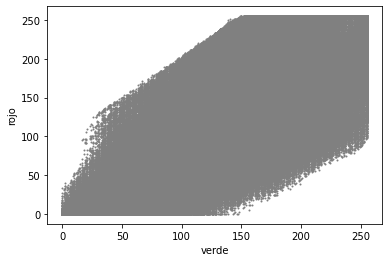

In [ ]:
f1 = df['verde'].values
f2 = df['rojo'].values
Xn=np.zeros((len(f1),2))
Xn[:,0]=f1
Xn[:,1]=f2


plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel('verde')
plt.ylabel('rojo')
plt.show()

## Calculos para metodo del codo

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(Xn)
    kmeanModel.fit(Xn)

    distortions.append(sum(np.min(cdist(Xn, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / Xn.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(Xn, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / Xn.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

## Grafico del codo

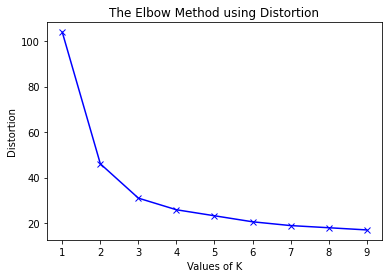

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')

plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Podemos ver que el punto de inflexion es 2, por lo que elegiremos 3 clusters

# K-Means con 3 clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


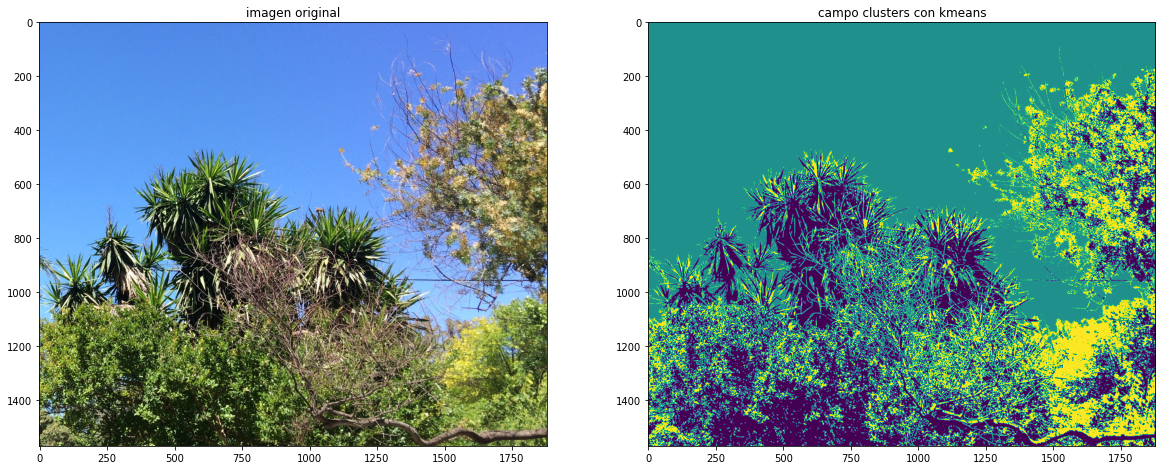

In [ ]:
kmeanss = KMeans(n_clusters=3)
kmeanss.fit(Xn)
imagen_kmedias_scaled=np.reshape(kmeanss.labels_, (cant_filas,cant_columnas))
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(ImagenRGB),plt.title('imagen original')
plt.subplot(122),plt.imshow(imagen_kmedias_scaled),plt.title('campo clusters con kmeans')

plt.show()

# MeanShift

## Calculo de BandWidth

In [ ]:
from sklearn.cluster import MeanShift
from sklearn import decomposition
from sklearn.cluster import estimate_bandwidth



bwMS=estimate_bandwidth(Xn,quantile=0.1, n_samples=5000)
print(bwMS)

27.39320059412294


In [ ]:
ms2 = MeanShift(bandwidth=27, bin_seeding=True)
ms2.fit(Xn)
labelsMS = ms2.labels_
cluster_centersMS = ms2.cluster_centers_

labels_uniqueMS = np.unique(labelsMS)
n_clustersMS_ = len(labels_uniqueMS)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clustersMS_)


Cantidad de clusters encontrados por Mean Shift : 2


# Muestro resultados finales

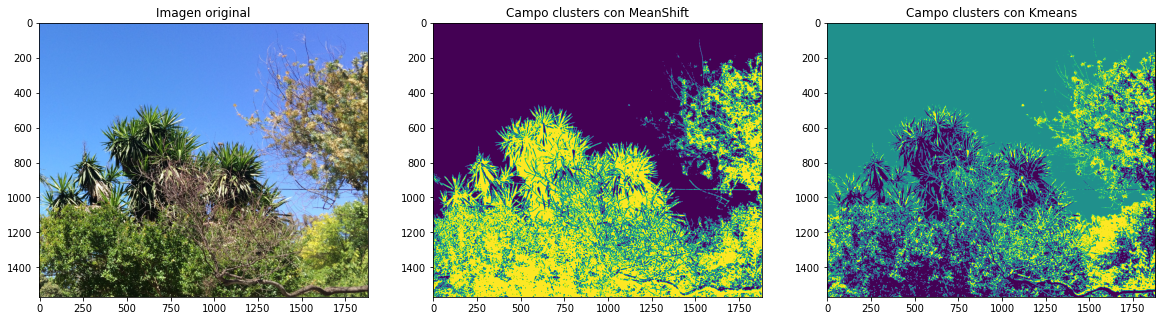

In [ ]:
imagen_MS=np.reshape(ms2.labels_, (cant_filas,cant_columnas))


#plt.imshow(Imagen)
#plt.imshow(imagen_MS)
plt.figure(figsize=(20,15 ))
plt.subplot(131),plt.imshow(ImagenRGB),plt.title('Imagen original')
plt.subplot(132),plt.imshow(imagen_MS),plt.title('Campo clusters con MeanShift')
plt.subplot(133),plt.imshow(imagen_kmedias_scaled),plt.title('Campo clusters con Kmeans')
plt.show()






### Concluciones:





1. Ambos modelos de clustering separan correctamente el fondo de la vegetacion.
2. Se puede ver que la vegetacion a la derecha de la imagen esta en otro plano y mas desenfocada, el algoritmo de K-Means logra captar dicha propiedad y agrupalo en otro cluster
3. El algoritmo de MeanShift funciona bien, pero solo separa el fondo de la vegetacion.




